<a href="https://colab.research.google.com/github/JeffersonCezar/Analise_Dados/blob/main/Projeto_An%C3%A1lise_de_compras_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analise de compras de Clientes de várias academias nos últimos 30 dias

### **IMPORTANDO BIBLIOTECAS**

In [1]:
# Importando Pandas e MatplotLib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Trabalhando com Data e Hora
from datetime import date, datetime, timedelta

### **IMPORTANDO ARQUIVO CSV**

In [2]:
# Importando plano para Dataframe
df_clientes = pd.read_csv("/content/drive/MyDrive/Datasets/Cliente_SGA.csv", sep=";")
#df_clientes.head(3)

In [ ]:
# Informações sobre o dataframe
print("Tamanho do dataframe: ", df_clientes.shape)
# Datatypes de cada coluna
df_clientes.dtypes  

### **TRANSFORMAÇÃO DE DADOS**

In [ ]:
# Convertendo colunas para tipo DATA
df_clientes["DATA_CONTRATACAO"] = pd.to_datetime(df_clientes["DATA_CONTRATACAO"])
df_clientes["DATA_NASCIMENTO"] = pd.to_datetime(df_clientes["DATA_NASCIMENTO"])
df_clientes["INICIO_VIGENCIA_PLANO"] = pd.to_datetime(df_clientes["INICIO_VIGENCIA_PLANO"])
df_clientes["TERMINO_VIGENCIA_PLANO"] = pd.to_datetime(df_clientes["TERMINO_VIGENCIA_PLANO"])
df_clientes["TERMINO_PLANO_ACORDADO"] = pd.to_datetime(df_clientes["TERMINO_PLANO_ACORDADO"])

# Substituindo caracteres flutuantes
df_clientes['PRECO_PLANO'] = df_clientes['PRECO_PLANO'].str.replace('.','').str.replace(',','.') 
df_clientes['DESCONTO_PRECO_PLANO'] = df_clientes['DESCONTO_PRECO_PLANO'].str.replace('.','').str.replace(',','.')
df_clientes['VALOR_FINAL_PLANO'] = df_clientes['VALOR_FINAL_PLANO'].str.replace('.','').str.replace(',','.')

# Convertendo string em Float
df_clientes['PRECO_PLANO'] = df_clientes['PRECO_PLANO'].astype(float) 
df_clientes['DESCONTO_PRECO_PLANO'] = df_clientes['DESCONTO_PRECO_PLANO'].astype(float)
df_clientes['VALOR_FINAL_PLANO'] = df_clientes['VALOR_FINAL_PLANO'].astype(float)

# Datatypes de cada coluna após conversão de campos do tipo DATA
df_clientes.dtypes  

In [ ]:
# Verificando a quantidade de valores nulos no DF
df_clientes.isnull().sum()

In [ ]:
# Substituindo valores nulos
df_clientes["FATOR_REAJUSTE_EMPRESA_CONVENIADA"].fillna(0, inplace=True) # Subsituindo por zero (0) FATOR_REAJUSTE_EMPRESA_CONVENIADA
df_clientes["EMPRESA_CONVENIADA"].fillna('Sem Convênio', inplace=True) # Subsituindo valores nulos por "Sem convênio" EMPRESA_CONVENIADA

# Verificando a quantidade de valores nulos no DF após transformação de dados
df_clientes.isnull().sum()

In [64]:
# Transformando alguns dados:
df_clientes["IDADE"] = round(((pd.to_datetime(date.today()) - pd.to_datetime(df_clientes["DATA_NASCIMENTO"]) ).dt.days)/365.2425 , 1)    # Idade dos clientes
df_clientes["FAIXA_ETARIA"] = ''
df_clientes.loc[df_clientes['IDADE'].between(0, 11.9, inclusive=True), 'FAIXA_ETARIA'] = 'Criança'
df_clientes.loc[df_clientes['IDADE'].between(12, 25.9, inclusive=True), 'FAIXA_ETARIA'] = 'Jovem'
df_clientes.loc[df_clientes['IDADE'].between(26, 59.9, inclusive=True), 'FAIXA_ETARIA'] = 'Adulto'
df_clientes.loc[df_clientes['IDADE'].between(60, 200, inclusive=True), 'FAIXA_ETARIA'] = 'Idoso'
df_clientes["DIA_PAGAMENTO"] = df_clientes["DATA_CONTRATACAO"].dt.day                               # Dia de pagamento da mensalidade
df_clientes["PRAZO_CONTRATADO"] = (df_clientes["TERMINO_PLANO_ACORDADO"] - df_clientes["INICIO_VIGENCIA_PLANO"]).dt.days # Prazo contratado

df_clientes.sample(2)

,UNIDADE,DATA_CONTRATACAO,MATRICULA,CLIENTE,SEXO,DATA_NASCIMENTO,ESTRANGEIRO,INICIO_VIGENCIA_PLANO,TERMINO_VIGENCIA_PLANO,TERMINO_PLANO_ACORDADO,ESTADO_CONTRATO,RETROAGIDO,PLANO,FREQUENCIA,PERIODICIDADE,ESTADO_PLANO_CONTRATO,VALIDADE_PRECO,PRECO_PLANO,DESCONTO_PRECO_PLANO,VALOR_FINAL_PLANO,EMPRESA_CONVENIADA,FATOR_REAJUSTE_EMPRESA_CONVENIADA,NUMERO_CARRINHO_COMPRA,STATUS_CLIENTE,IDADE,FAIXA_ETARIA,DIA_PAGAMENTO,PRAZO_CONTRATADO
3277,UNIDADE 45,2021-08-18 07:20:35.627,722168,CLIENTE 722168,F,1984-11-14,N,2021-08-18,2021-09-17,2021-09-17,Ativo,0,Fitness Débito,7x,Mensal,Ativo,2021-08-23 07:20:35.640,436.03,436.03,418.44,Sem Convênio,0.0,131933,Ativo,36.8,Adulto,18,30
11017,UNIDADE 36,2021-08-10 16:18:52.973,386355,CLIENTE 386355,M,1968-11-05,N,2021-08-10,2021-09-09,2021-09-09,Ativo,0,Fitness Débito,7x,Mensal,Ativo,2021-12-31 00:00:00.000,514.44,514.44,380.50,Sem Convênio,0.0,93901,Ativo,52.8,Adulto,10,30


### **ANÁLISE DE DADOS E CARREGAMENTO EM DATAFRAMES**

In [10]:
#Descrição (conjunto estatísticos)

# Intervalo da data de compras
print("Primeira compra do intervalo: {0} e última compra do intervalo: {1}".format(df_clientes["DATA_CONTRATACAO"].min().strftime('%d/%m/%Y'), df_clientes["DATA_CONTRATACAO"].max().strftime('%d/%m/%Y') )) 
print("----------------------------------------------------------------------------------------------")
print('')

# Intervalo de dias contratados
print("Menor prazo de contratação {0}, maior prazo de contratação {1}".format(df_clientes["PRAZO_CONTRATADO"].min(), df_clientes["PRAZO_CONTRATADO"].max()) ) 
print("----------------------------------------------------------------------------------------------")

# Intervalo do valor das compras
print("Valor da menor compra: {0} , valor da maior compra: {1}".format(df_clientes["VALOR_FINAL_PLANO"].min(), df_clientes["VALOR_FINAL_PLANO"].max()) )
print("----------------------------------------------------------------------------------------------")
print('')

# Unidade que mais vendeu
print('Unidade com mais vendas: ',df_clientes["UNIDADE"].value_counts(ascending=False).head(1) )
print("----------------------------------------------------------------------------------------------")
print('')

# Unidade que mais faturou
print('Unidade com maior faturamento: ', df_clientes.groupby(['UNIDADE'])['VALOR_FINAL_PLANO'].agg('sum').sort_values(ascending=False).head(1) )
print('')

# Unidade que menos vendeu
print('Unidade com menos vendas: ',df_clientes["UNIDADE"].value_counts(ascending=False).tail(1) )
print("----------------------------------------------------------------------------------------------")
print('')

# Unidade que menos faturou
print('Unidade com menor faturamento: ', df_clientes.groupby(['UNIDADE'])['VALOR_FINAL_PLANO'].agg('sum').sort_values(ascending=True).head(1) )
print("----------------------------------------------------------------------------------------------")
print('')

# Unidade que mais deu desconto
print('Unidade que concedeu mais desconto: ', df_clientes[df_clientes["PRECO_PLANO"] != df_clientes["VALOR_FINAL_PLANO"] ].groupby(["UNIDADE"])['UNIDADE'].count().sort_values(ascending=False).head(1) )
print("----------------------------------------------------------------------------------------------")
print('')

# Descrições gerais do dataframe
print("Descrição geral dos valores do dataframe:")
df_clientes.describe()

Primeira compra do intervalo: 28/07/2021 e última compra do intervalo: 21/08/2021
----------------------------------------------------------------------------------------------

Menor prazo de contratação 22, maior prazo de contratação 364
----------------------------------------------------------------------------------------------
Valor da menor compra: 0.0 , valor da maior compra: 13764.0
----------------------------------------------------------------------------------------------

Unidade com mais vendas:  UNIDADE 2    1119
Name: UNIDADE, dtype: int64
----------------------------------------------------------------------------------------------

Unidade com maior faturamento:  UNIDADE
UNIDADE 15    1038620.43
Name: VALOR_FINAL_PLANO, dtype: float64

Unidade com menos vendas:  UNIDADE 63    13
Name: UNIDADE, dtype: int64
----------------------------------------------------------------------------------------------

Unidade com menor faturamento:  UNIDADE
UNIDADE 63    52496.0
Name:

,MATRICULA,RETROAGIDO,PRECO_PLANO,DESCONTO_PRECO_PLANO,VALOR_FINAL_PLANO,FATOR_REAJUSTE_EMPRESA_CONVENIADA,NUMERO_CARRINHO_COMPRA,IDADE,DIA_PAGAMENTO,PRAZO_CONTRATADO
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,734833.45896,0.001280,1096.212882,972.470810,931.412018,0.012950,158862.020800,32.129396,15.625520,93.454120
std,244832.11876,0.035755,1561.635090,1530.059974,1489.932586,0.089583,108838.141128,15.228006,8.804098,121.667035
min,4.00000,0.000000,1.000000,0.000000,0.000000,0.000000,7294.000000,0.500000,1.000000,22.000000
25%,544898.00000,0.000000,303.000000,198.000000,190.500000,0.000000,68390.750000,22.100000,8.000000,30.000000
50%,808957.00000,0.000000,464.180000,373.000000,336.900000,0.000000,131901.500000,31.600000,16.000000,30.000000
75%,960465.25000,0.000000,948.000000,697.450000,641.000000,0.000000,219826.000000,41.400000,23.000000,91.000000
max,984276.00000,1.000000,13764.000000,13764.000000,13764.000000,0.990000,405660.000000,120.700000,31.000000,364.000000


In [ ]:
# Empresas convêniadas
df_empresas_conveniadas = df_clientes[df_clientes.EMPRESA_CONVENIADA != 'Sem Convênio'].groupby(["EMPRESA_CONVENIADA"])['NUMERO_CARRINHO_COMPRA'].agg('count')
#
#df_empresas_conveniadas.set_index('EMPRESA_CONVENIADA', inplace=True)
plt.rcParams['figure.figsize'] = (20,20)
df_empresas_conveniadas.sort_values().plot.bar(title="Total de vendas por convênio", color="red")
plt.style.use('ggplot')
plt.show()


In [ ]:
# Quantidade de convênios por unidade
df_convenio_unidade = df_clientes[df_clientes.EMPRESA_CONVENIADA != 'Sem Convênio'].groupby(["UNIDADE"])['EMPRESA_CONVENIADA'].agg('count')
plt.rcParams['figure.figsize'] = (20,20)
df_convenio_unidade.sort_values().plot.bar(title="Total de convênios por unidade", color="blue")
plt.style.use('ggplot')
plt.show()


In [ ]:
#Convênios por Unidade e Gênero
df_convenio_unidade_genero = pd.pivot_table(data=df_clientes, values='EMPRESA_CONVENIADA', index='UNIDADE', columns='SEXO', aggfunc='count').sort_values(by="UNIDADE")
bar_1 = df_convenio_unidade_genero["F"]# Array com gênero feminino com total de convênios
bar_2 = df_convenio_unidade_genero["M"]# Array com gênero feminino com total de convênios

x_pos = np.arange(len(df_convenio_unidade_genero)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,20)
first_bar = plt.bar(x_pos, bar_1, 0.3, color='b', label="Feminino")
second_bar = plt.bar(x_pos, bar_2, 0.3, color='y', label="Masculino", bottom=bar_1)
df_unidades = df_clientes["UNIDADE"].sort_values().unique()

plt.xticks(x_pos, (df_unidades), rotation=90) # Definir posição e labels no eixo X
plt.legend()
plt.show()

In [ ]:
# Quantidade de convênios por faixa etária
df_convenio_faixa_etaria = df_clientes[df_clientes.EMPRESA_CONVENIADA != 'Sem Convênio'].groupby(["FAIXA_ETARIA"])['EMPRESA_CONVENIADA'].agg('count')
plt.rcParams['figure.figsize'] = (10,10)
df_convenio_faixa_etaria.sort_values().plot.bar(title="Total de convênios por faixa etária", color="blue")
plt.style.use('ggplot')
plt.show()

In [ ]:
# Distribuição de cliente ativos e inativos por unidade
df_cliente_unidade_status = pd.pivot_table(data=df_clientes, values='MATRICULA', index='UNIDADE', columns='STATUS_CLIENTE', aggfunc='count').sort_values(by="UNIDADE")

bar_1 = df_cliente_unidade_status['Ativo']# Array com ativos por unidade
bar_2 = df_cliente_unidade_status['Inativo']# Array com inativos por unidade

x_pos = np.arange(len(df_cliente_unidade_status)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,10)
first_bar = plt.bar(x_pos, bar_1, 0.3, color='b', label="Ativo")
second_bar = plt.bar(x_pos, bar_2, 0.3, color='r', label="Inativo", bottom=bar_1)
df_unidades = df_clientes["UNIDADE"].sort_values().unique()

plt.xticks(x_pos, (df_unidades), rotation=90) # Definir posição e labels no eixo X
plt.legend()
plt.show()

In [ ]:
# Distribuição de contratos ativos por unidade
df_contratos_ativos = df_clientes[df_clientes.EMPRESA_CONVENIADA != 'Sem Convênio'].groupby(["FAIXA_ETARIA"])['EMPRESA_CONVENIADA'].agg('count')
plt.rcParams['figure.figsize'] = (10,10)
df_convenio_faixa_etaria.sort_values().plot.bar(title="Total de convênios por faixa etária", color="blue")
plt.style.use('ggplot')
plt.show()

In [ ]:
# Distribuição de contratos (status) por unidade
df_cliente_contrato_status = pd.pivot_table(data=df_clientes, values='MATRICULA', index='UNIDADE', columns='ESTADO_CONTRATO', aggfunc='count').sort_values(by="UNIDADE")

bar_1 = df_cliente_contrato_status['Ativo']# Array com ativos por unidade
bar_2 = df_cliente_contrato_status['Não Aprovado']# Array com não aprovados por unidade
bar_3 = df_cliente_contrato_status['Excluído']# Array com excluídos por unidade
bar_4 = df_cliente_contrato_status['Cancelado']# Array com cancelados por unidade
bar_5 = df_cliente_contrato_status['Vencido']# Array com vencidos por unidade

x_pos = np.arange(len(df_cliente_contrato_status)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,10)
first_bar  = plt.bar(x_pos, bar_1, 0.3, color='b', label="Ativo")
second_bar = plt.bar(x_pos, bar_5, 0.3, color='m', label="Vencido", bottom=bar_1)
thirth_bar = plt.bar(x_pos, bar_4, 0.3, color='y', label="Cancelado", bottom=bar_5)
fourth_bar = plt.bar(x_pos, bar_2, 0.3, color='r', label="Não Aprovado", bottom=bar_4)
fifth_bar  = plt.bar(x_pos, bar_3, 0.3, color='k', label="Excluído", bottom=bar_2)
df_unidades = df_clientes["UNIDADE"].sort_values().unique()

plt.xticks(x_pos, (df_unidades), rotation=90) # Definir posição e labels no eixo X
plt.legend()
plt.show()


In [ ]:
# Distribuição de gêneros por unidade
df_cliente_genero_unidade = pd.pivot_table(data=df_clientes, values='MATRICULA', index='UNIDADE', columns='SEXO', aggfunc='count').sort_values(by="UNIDADE")

bar_1 = df_cliente_genero_unidade['M']# Array com gênero masculino por unidade
bar_2 = df_cliente_genero_unidade['F']# Array com gênero feminino por unidade

x_pos = np.arange(len(df_cliente_genero_unidade)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,10)
first_bar = plt.bar(x_pos, bar_1, 0.3, color='b', label="Masculino")
second_bar = plt.bar(x_pos, bar_2, 0.3, color='y', label="Feminino", bottom=bar_1)
df_unidades = df_clientes["UNIDADE"].sort_values().unique()

plt.xticks(x_pos, (df_unidades), rotation=90) # Definir posição e labels no eixo X
plt.legend()
plt.show()

In [ ]:
# Clientes estrangeiros nas unidades
df_unidade_estrangeiros = pd.pivot_table(data=df_clientes[df_clientes['ESTRANGEIRO']=='S'], values='MATRICULA', index='UNIDADE', columns='ESTRANGEIRO', aggfunc='count').sort_values(by="UNIDADE")
plt.rcParams['figure.figsize'] = (20,5)
df_unidade_estrangeiros.sort_values(by="UNIDADE").plot.bar(title="Distribuição de clientes Estrangeiros por Unidades", color="darkorchid")
plt.style.use('ggplot')
plt.show()

In [ ]:
# Distribuição de clientes idosos por Unidade
df_unidade_idosos = pd.pivot_table(data=df_clientes[df_clientes['FAIXA_ETARIA']=='Idoso'], values='MATRICULA', index='UNIDADE', columns='FAIXA_ETARIA', aggfunc='count').sort_values(by="UNIDADE")
plt.rcParams['figure.figsize'] = (20,5)
df_unidade_idosos.sort_values(by="UNIDADE").plot.bar(title="Distribuição de clientes Idosos por Unidades", color="darkorange")
plt.style.use('ggplot')
plt.show()

In [ ]:
# Distribuição de de clientes adultos por unidade
df_unidade_adulto = pd.pivot_table(data=df_clientes[df_clientes['FAIXA_ETARIA']=='Adulto'], values='MATRICULA', index='UNIDADE', columns='FAIXA_ETARIA', aggfunc='count').sort_values(by="UNIDADE")
plt.rcParams['figure.figsize'] = (20,5)
df_unidade_adulto.sort_values(by="UNIDADE").plot.bar(title="Distribuição de clientes Adulto por Unidades", color="forestgreen")
plt.style.use('ggplot')
plt.show()

In [ ]:
# DIstribuição de clientes Jovens de idade por unidade
df_unidade_adulto = pd.pivot_table(data=df_clientes[df_clientes['FAIXA_ETARIA']=='Jovem'], values='MATRICULA', index='UNIDADE', columns='FAIXA_ETARIA', aggfunc='count').sort_values(by="UNIDADE")
plt.rcParams['figure.figsize'] = (20,5)
df_unidade_adulto.sort_values(by="UNIDADE").plot.bar(title="Distribuição de clientes Adulto por Unidades", color="forestgreen")
plt.style.use('ggplot')
plt.show()

In [ ]:
# DIstribuição de clientes menores de idade por unidade
df_unidade_jovem = pd.pivot_table(data=df_clientes[df_clientes['FAIXA_ETARIA']=='Criança'], values='MATRICULA', index='UNIDADE', columns='FAIXA_ETARIA', aggfunc='count').sort_values(by="UNIDADE")
plt.rcParams['figure.figsize'] = (20,5)
df_unidade_jovem.sort_values(by="UNIDADE").plot.bar(title="Distribuição de clientes Criança por Unidades", color="deeppink")
plt.style.use('ggplot')
plt.show()

In [ ]:
# Vendas por unidade
df_unidade_vendas = df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')].groupby(["UNIDADE"])['NUMERO_CARRINHO_COMPRA'].agg('count').reset_index()
plt.rcParams['figure.figsize'] = (20,10)
df_unidade_vendas.sort_values(by=['UNIDADE']).plot.bar(title="Quantidade de vendas por Unidade", color="green")
plt.style.use('ggplot')
plt.show()

In [ ]:
# Vendas por dia 
df_vendas_dia = data=df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')].groupby(["DIA_PAGAMENTO"])['NUMERO_CARRINHO_COMPRA'].agg('count')
plt.rcParams['figure.figsize'] = (20,10)
df_vendas_dia.plot.line(marker="v", title="Quantidade de vendas por Dia", color="teal")
plt.style.use('ggplot')
plt.legend()
plt.show()

In [ ]:
# vendas por horário
df_vendas_hora = data=df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')].groupby(df_clientes["DATA_CONTRATACAO"].dt.hour)['NUMERO_CARRINHO_COMPRA'].agg('count')
plt.rcParams['figure.figsize'] = (20,10)
df_vendas_hora.plot.line(marker="v", title="Quantidade de vendas por Hora", color="tomato")
plt.style.use('ggplot')
plt.legend()
plt.show()

In [ ]:
# Vendas por Idade
df_vendas_faixa_etaria = data=df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')].groupby(["FAIXA_ETARIA"])['NUMERO_CARRINHO_COMPRA'].agg('count')
plt.rcParams['figure.figsize'] = (20,5)
df_vendas_faixa_etaria.plot.bar(title="Quantidade de vendas por Faixa Etária", color="black")
plt.style.use('ggplot')
plt.show()

In [ ]:
# TOP 10 Planos mais vendidos
df_cliente_planos = df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')].groupby(["PLANO"])['NUMERO_CARRINHO_COMPRA'].agg('count')
df_cliente_planos.sort_values(ascending=False).head(10)

In [ ]:
# Top 5 planos mais vendidos para homens
df_cliente_masculino_planos = df_clientes[df_clientes.SEXO == 'M'].groupby(["PLANO"])['NUMERO_CARRINHO_COMPRA'].agg('count')
df_cliente_masculino_planos.sort_values(ascending=False).head(5)

In [ ]:
# TOP 5 planos mais vendidos para mulheres
df_cliente_feminino_planos = df_clientes[df_clientes.SEXO == 'F'].groupby(["PLANO"])['NUMERO_CARRINHO_COMPRA'].agg('count')
df_cliente_feminino_planos.sort_values(ascending=False).head(5)

In [ ]:
# TOP 10 Planos mais vendidos para Idosos
df_cliente_planos_idosos = df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído') & (df_clientes.FAIXA_ETARIA=='Idoso')].groupby(["PLANO"])['NUMERO_CARRINHO_COMPRA'].agg('count')
df_cliente_planos_idosos.sort_values(ascending=False).head(10)

In [ ]:
# TOP 10 PLanos mais vendidos para menores de Crianças
df_cliente_planos_crianca = df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído') & (df_clientes.FAIXA_ETARIA=='Criança')].groupby(["PLANO"])['NUMERO_CARRINHO_COMPRA'].agg('count')
df_cliente_planos_crianca.sort_values(ascending=False).head(10)

In [ ]:
# Planos/Periodicidade vendidos por unidade
df_vendas_periodicidade_plano = pd.pivot_table(data=df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')], values='PLANO', index='UNIDADE', columns='PERIODICIDADE', aggfunc='count').sort_values(by="UNIDADE")

bar_1 = df_vendas_periodicidade_plano['Mensal']# Array com periodicidades mensais por unidade
bar_2 = df_vendas_periodicidade_plano['Trimestral']# Array com periodicidades trimenstrais por unidade
bar_3 = df_vendas_periodicidade_plano['Semestral']# Array com periodicidades semestrais por unidade
bar_4 = df_vendas_periodicidade_plano['Anual']# Array com periodicidades anuais por unidade

x_pos = np.arange(len(df_vendas_periodicidade_plano)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,10)
first_bar = plt.bar(x_pos, bar_1, 0.3, color='b', label="Mensal")
second_bar = plt.bar(x_pos, bar_2, 0.3, color='m', label="Trimestral", bottom=bar_1)
thirth_bar = plt.bar(x_pos, bar_3, 0.3, color='y', label="Semestral", bottom=bar_2)
fourth_bar = plt.bar(x_pos, bar_4, 0.3, color='r', label="Anual", bottom=bar_3)
df_unidades = df_clientes["UNIDADE"].sort_values().unique()

plt.xticks(x_pos, (df_unidades), rotation=90) # Definir posição e labels no eixo X
plt.legend()
plt.show()

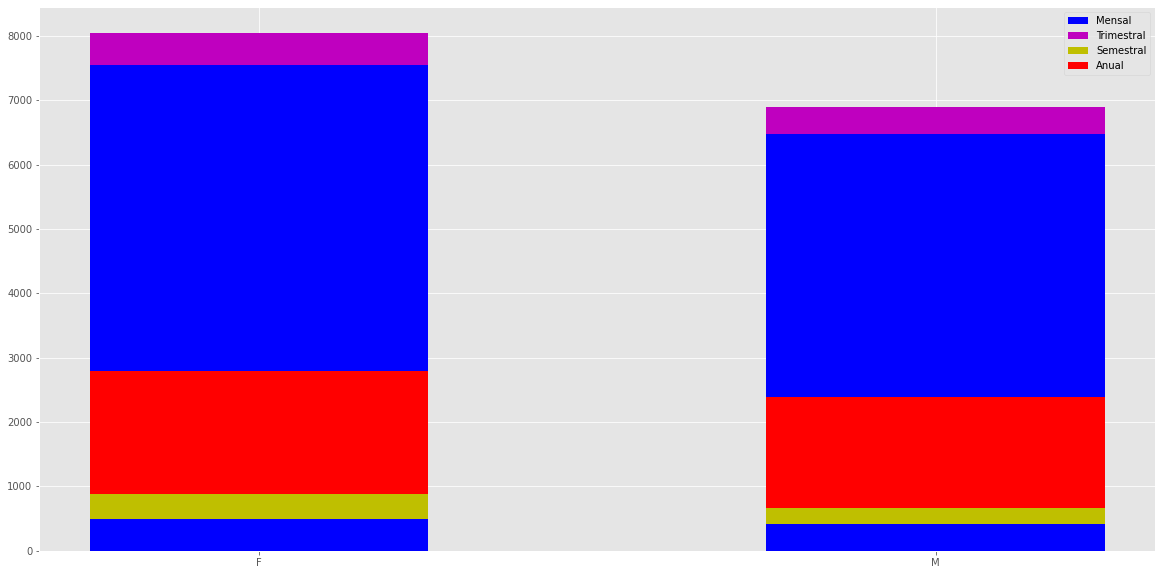

In [134]:
# Periodicidades por gênero
df_vendas_periodicidade_genero = pd.pivot_table(data=df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')], values='PLANO', index='SEXO', columns='PERIODICIDADE', aggfunc='count').sort_values(by="SEXO")

bar_1 = df_vendas_periodicidade_genero['Mensal']# Array com Mensal por gênero
bar_2 = df_vendas_periodicidade_genero['Trimestral']# Array com Trimestral por gênero
bar_3 = df_vendas_periodicidade_genero['Semestral']# Array com Semestral por gênero
bar_4 = df_vendas_periodicidade_genero['Anual']# Array com Anual por gênero

x_pos = np.arange(len(df_vendas_periodicidade_genero)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,10)
first_bar = plt.bar(x_pos, bar_1, 0.5, color='b', label="Mensal")
second_bar = plt.bar(x_pos, bar_2, 0.5, color='m', label="Trimestral", bottom=bar_1)
thirth_bar = plt.bar(x_pos, bar_3, 0.5, color='y', label="Semestral", bottom=bar_2)
fourth_bar = plt.bar(x_pos, bar_4, 0.5, color='r', label="Anual", bottom=bar_3)
df_sexo = df_clientes["SEXO"].sort_values().unique()

plt.xticks(x_pos, (df_sexo)) # Definir posição e labels no eixo X
plt.legend()
plt.show()

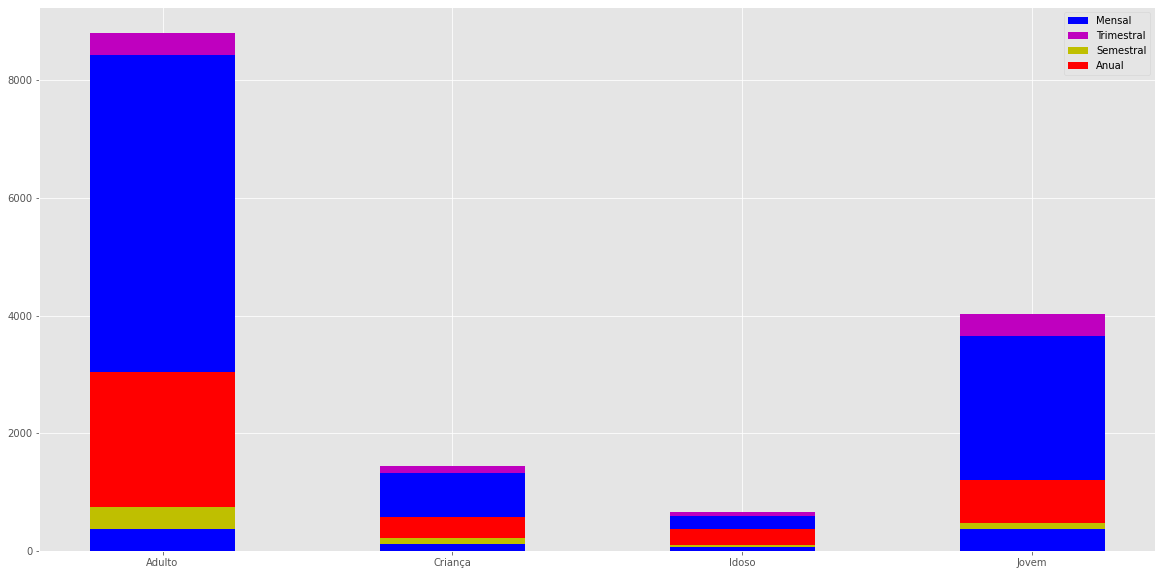

In [135]:
# Periodicidades por faixa etária
df_vendas_periodicidade_faixa_etaria = pd.pivot_table(data=df_clientes[(df_clientes.ESTADO_PLANO_CONTRATO != 'Não Aprovado') & (df_clientes.ESTADO_PLANO_CONTRATO != 'Excluído')], values='PLANO', index='FAIXA_ETARIA', columns='PERIODICIDADE', aggfunc='count').sort_values(by="FAIXA_ETARIA")

bar_1 = df_vendas_periodicidade_faixa_etaria['Mensal']# Array com Mensal por gênero
bar_2 = df_vendas_periodicidade_faixa_etaria['Trimestral']# Array com Trimestral por gênero
bar_3 = df_vendas_periodicidade_faixa_etaria['Semestral']# Array com Semestral por gênero
bar_4 = df_vendas_periodicidade_faixa_etaria['Anual']# Array com Anual por gênero

x_pos = np.arange(len(df_vendas_periodicidade_faixa_etaria)) # Range com a quantidade de itens das barras

plt.rcParams['figure.figsize'] = (20,10)
first_bar = plt.bar(x_pos, bar_1, 0.5, color='b', label="Mensal")
second_bar = plt.bar(x_pos, bar_2, 0.5, color='m', label="Trimestral", bottom=bar_1)
thirth_bar = plt.bar(x_pos, bar_3, 0.5, color='y', label="Semestral", bottom=bar_2)
fourth_bar = plt.bar(x_pos, bar_4, 0.5, color='r', label="Anual", bottom=bar_3)
df_sexo = df_clientes["FAIXA_ETARIA"].sort_values().unique()

plt.xticks(x_pos, (df_sexo)) # Definir posição e labels no eixo X
plt.legend()
plt.show()